In [1]:
import pymesh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import math
import itertools

In [2]:
'''Functions'''
def rotate_origin_only(x, y, radians):
    """Only rotate a point around the origin (0, 0)."""
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

In [3]:
tree1 = pymesh.generate_cylinder((0, 0, 0), (0, 0, 3), 1.5, 0.25, 12)
tree2 = pymesh.generate_cylinder((0.5, 1, 0), (0.5, 1, 2), 1, 0.25, 12)
tree3 = pymesh.generate_cylinder((1.5, 3, 0), (1.5, 3, 4), 2.5, 0.25, 12)

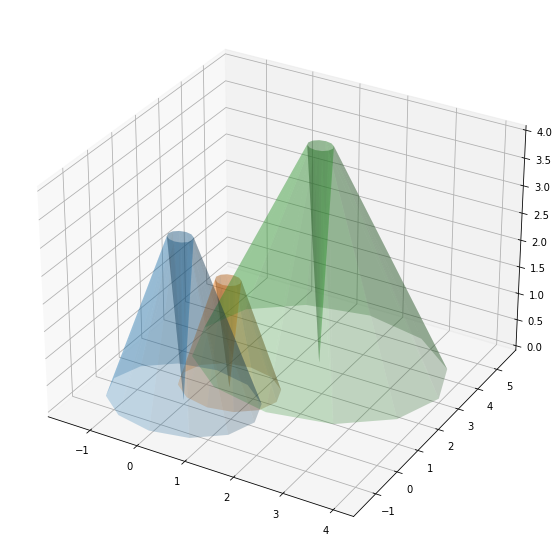

In [4]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.plot_trisurf(x,y,z, alpha = 0.25)

In [5]:
'''Compute Union of Trees'''
uni = pymesh.boolean(pymesh.boolean(tree1, tree2, 'union'), tree3, 'union')

In [6]:
uniTree = pymesh.CSGTree({"union": [{"mesh": mesh} for mesh in [tree1, tree2, tree3]]})

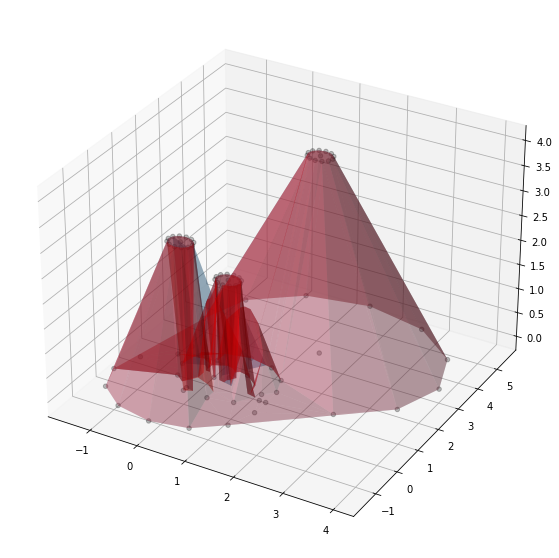

In [7]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.scatter(x,y,z, color = 'black', alpha = 0.25)

l = len(uni.vertices)
x_uni = [uni.vertices[i][0] for i in range(0, l)]
y_uni = [uni.vertices[i][1] for i in range(0, l)]
z_uni = [uni.vertices[i][2] for i in range(0, l)]
ax.plot_trisurf(x_uni, y_uni, z_uni, alpha = 0.25)

ltree = len(uniTree.mesh.vertices)
x_uniTree = [uniTree.mesh.vertices[i][0] for i in range(0, ltree)]
y_uniTree = [uniTree.mesh.vertices[i][1] for i in range(0, ltree)]
z_uniTree = [uniTree.mesh.vertices[i][2] for i in range(0, ltree)]
ax.plot_trisurf(x_uniTree, y_uniTree, z_uniTree, color = 'red', alpha = 0.25)

In [8]:
%%time
'''Compute Intersection of Trees'''
intersects = []
for t in [tree1, tree2, tree3]:
    for t2 in [tree1, tree2, tree3]:
        if t == t2:
            next
        else:
            i = pymesh.boolean(t, t2, 'intersection')
            intersects.append(i)
     
u = intersects[0]
for i in (1, len(intersects) - 1):
    u = pymesh.boolean(u, intersects[i], 'union')        

CPU times: user 3.76 s, sys: 225 ms, total: 3.99 s
Wall time: 3.41 s


In [9]:
u.volume

1.9526667751577111

In [10]:
%%time
'''Compute Intersection of Trees'''
trees = [tree1, tree2, tree3]
treeComb = itertools.combinations(trees, 2)

#loop
intersects = [pymesh.boolean(i, j, 'intersection') for (i, j) in treeComb]

#merge
ints = pymesh.CSGTree({"union": [{"mesh": mesh} for mesh in intersects]})    

CPU times: user 9.53 s, sys: 223 ms, total: 9.76 s
Wall time: 8.76 s


In [11]:
sum([m.volume for m in intersects])

2.2831363094583144

In [12]:
pymesh.CSGTree({"intersection": [{"mesh": mesh} for mesh in intersects]}).mesh.volume  

0.1652347671503018

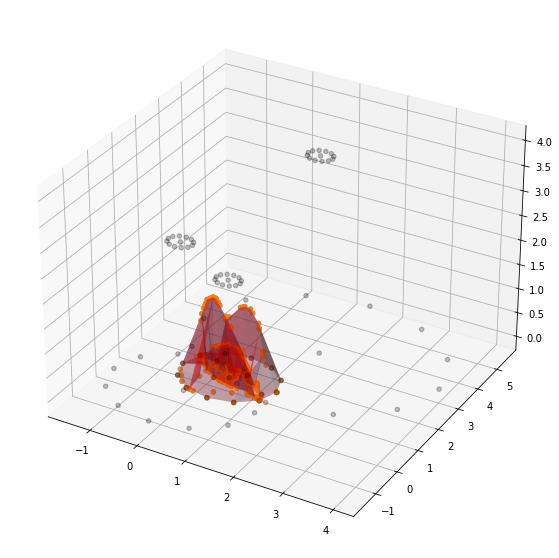

In [13]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.scatter(x,y,z, color = 'black', alpha = 0.25)
    
l = len(u.vertices)
x_int = [u.vertices[i][0] for i in range(0, l)]
y_int = [u.vertices[i][1] for i in range(0, l)]
z_int = [u.vertices[i][2] for i in range(0, l)]
ax.scatter(x_int, y_int, z_int)
ax.plot_trisurf(x_int, y_int, z_int, alpha = 0.25)

ls = len(ints.mesh.vertices)
x_ints = [ints.mesh.vertices[i][0] for i in range(0, ls)]
y_ints = [ints.mesh.vertices[i][1] for i in range(0, ls)]
z_ints = [ints.mesh.vertices[i][2] for i in range(0, ls)]
ax.scatter(x_ints, y_ints, z_ints)
ax.plot_trisurf(x_ints, y_ints, z_ints, color = 'red', alpha = 0.25)

In [14]:
#Hopkins Index
ELEVATION = 1384 #feet
LATITUDE = 47.5152344351
LONGITUDE = -93.4706821209
HI = ((ELEVATION - 887) / 100) * 1.0 + (LATITUDE - 39.54) * 4.0 + (-82.52-
LONGITUDE) * 1.25 

In [15]:
def createTree(dbh, dist, con, ba, hi):
    if con:
        #Simulate coniferous trees as Black Spruce
        #Calculate height
        height_ft = 4.5 + 2136.9468*math.exp(-6.2688*math.pow(dbh, -0.2161)) #feet
        height = height_ft*0.3048 #transform to m
        #Calulate crown ratio
        cr = 10*(5.540/(1 + 0.0072*ba)) + (4.200*(1 - math.exp(-0.0530*dbh)))
        #Calculate crown
        crown_ft = -0.8566 + 0.9693*dbh + 0.0573*cr   
        crown = (crown_ft*0.3048)/2
    else:
        #Simulate deciduous trees as Red Maple
        #Calculate height
        height_ft = 4.5 * math.exp(4.3379 + ((-3.8214)/(dbh + 1))) #feet
        height = height_ft*0.3048 #transform to m
        #Calulate crown ratio
        #cr = 10*(4.340/(1 + 0.0046*ba)) + (1.820*(1 - math.exp(-0.2740*dbh)))
        #Calculate crown
        #crown_ft = 2.7562 + 1.4212*dbh - 0.0143*math.pow(dbh, 2) + 0.0993*cr - 0.0276*hi 
        #crown = crown_ft*0.3048
        #Simply use BA as crown width
        crown = (dbh*0.0254)/2 #in to m then to radius
    
    #Rotate location
    #assume on x axis and rotate a random number of degrees
    deg = np.random.uniform(low = 0, high = 2*math.pi)
    xx, yy = rotate_origin_only(dist, 0, deg)

    #create point
    return pymesh.generate_cylinder((xx, yy, 0), (xx, yy, height), crown, 0, 12) 


In [20]:
'''Combine into function'''

def simulateSite3D(n, distMu, distSigma, dbhMu, dbhSigma, pCon, plots = False):
    #Step 1: Generate site
    site = pymesh.generate_cylinder((0, 0, 0), (0, 0, 25), 8, 8, 32)

    #Generate distances
    dists = np.random.normal(loc = distMu, scale = distSigma, size = n)
    #Check all are in correct range
    while ((dists > 8).any()) | ((dists < 0).any()):
        dists = np.random.normal(loc = distMu, scale = distSigma, size = n)

    #Generate DBHs (in cm)
    dbhs = np.random.normal(loc = dbhMu, scale = dbhSigma, size = n)
    #Check all are in correct range
    while(dbhs < 0).any():
        dbhs = np.random.normal(loc = dbhMu, scale = dbhSigma, size = n)
    #Convert to in
    dbhs_in = dbhs*0.3937
    
    #Calculate Basal Area for site (m2/hectare)
    BA = sum(math.pi*((dbhs/2)**2))*(1/(math.pi*((26.2)**2)))*(1/0.00000929)*(0.001)
    
    #Based on pCon, assign conifs
    nCon = int(n*pCon)
    con = np.concatenate((np.zeros(nCon), np.ones(n - nCon)))

    #Generate locations
    trees = []
    for i in range(0, len(dists)):
        trees.append(createTree(dbhs_in[i], dists[i], con[i], BA, HI))

    #Step 1.5: Calculate total tree canopy
    volumes = [tree.volume for tree in trees]
    tot = np.cumsum(volumes)[-1]

    #Step 2: Calculate total plot coverage
    #Use shapely to calculate the total union and the intersection over the union
    uni = trees[0]
    for tree in trees[1:]:
        uni = pymesh.boolean(uni, tree, 'union')
    
    uni_clipped = pymesh.boolean(uni, site, 'intersection')
    pcoverage = float(uni_clipped.volume/site.volume)

    #Step 3: Calculate total overlap
    #Collect intersections recursively
    #intersects = []
    #for i in range(len(trees)):
    #    for j in range(i):
    #        intersects.append(pymesh.boolean(trees[i], trees[j], 'intersection'))

    #merge
    #ints = intersects[0]
    #for i in range(1, len(intersects)):
    #    ints = pymesh.boolean(ints, intersects[i], 'union')
    treeComb = itertools.combinations(trees, 2)
    intersects = [pymesh.boolean(i, j, 'intersection') for (i, j) in treeComb]

    #merge
    ints = pymesh.CSGTree({"union": [{"mesh": mesh} for mesh in intersects]})    
    
    #Clip
    int_clipped = pymesh.boolean(ints.mesh, site, 'intersection')
    poverlap = float(int_clipped.volume/site.volume)

    #Step 4: Plot
    if(plots):
        fig = plt.figure(figsize = (12,10))
        ax = plt.axes(projection='3d')

        #plot trees
        for tree in trees:
            l = len(tree.vertices)
            x = [tree.vertices[i][0] for i in range(0, l)]
            y = [tree.vertices[i][1] for i in range(0, l)]
            z = [tree.vertices[i][2] for i in range(0, l)]
            ax.scatter(x,y,z, color = 'black', alpha = 0.25)
            #ax.plot_trisurf(x, y, z, color = 'black', alpha = 0.25)

        #plot intersection
        l = len(ints.vertices)
        x_int = [ints.vertices[i][0] for i in range(0, l)]
        y_int = [ints.vertices[i][1] for i in range(0, l)]
        z_int = [ints.vertices[i][2] for i in range(0, l)]
        ax.scatter(x_int, y_int, z_int)
        ax.plot_trisurf(x_int, y_int, z_int, alpha = 0.25)
        
        ax.set_ylim(-8, 8)
        ax.set_xlim(-8, 8)
    #ax.set_zlim(0, 25)

    return pcoverage, poverlap, tot

CPU times: user 1min 32s, sys: 5.3 s, total: 1min 37s
Wall time: 1min 23s


(0.03944977441220442, 0.01094029027515045, 259.67957933260703)

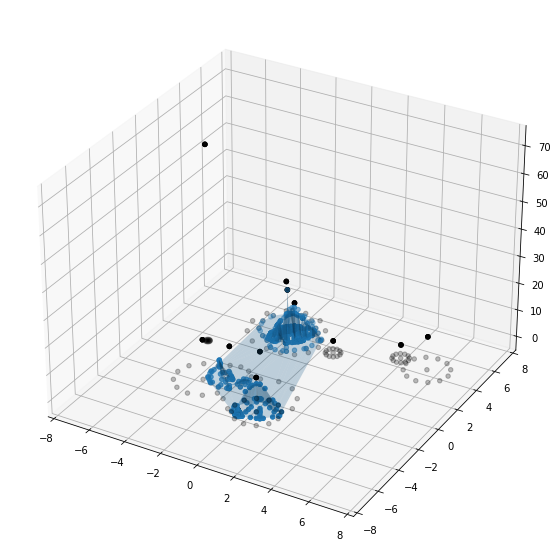

In [22]:
%%time
simulateSite3D(12, 4.2, 1.4, 22.8, 10.5, 0.11, plots = True)